In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("perfomance_sem_s.csv")

In [20]:
df.head()

,model,page,time_1,Noise Robustness,Negative Rejection,Information Integration,Counterfactual Robustness,Score,time_2,time_3,time_4,time_5,faithfulness,answer_relevancy
0,mitral,deepeek,104.04,1,1,3,3,8,119.36,114.97,112.96,112.27,0.886944,0.240890
1,llama_3.1,deepeek,112.00,2,3,1,2,8,110.63,111.86,115.37,109.97,0.718929,0.278314
2,dolphin3,deepeek,109.64,2,3,3,2,10,100.79,102.93,98.64,97.96,0.814167,0.647561
3,zephyr,deepeek,132.50,1,2,3,2,8,115.32,114.14,113.19,115.88,0.796111,0.282483
4,llama_3.1,nlp,150.33,5,6,7,7,25,145.32,136.64,146.60,141.11,0.812115,0.896704


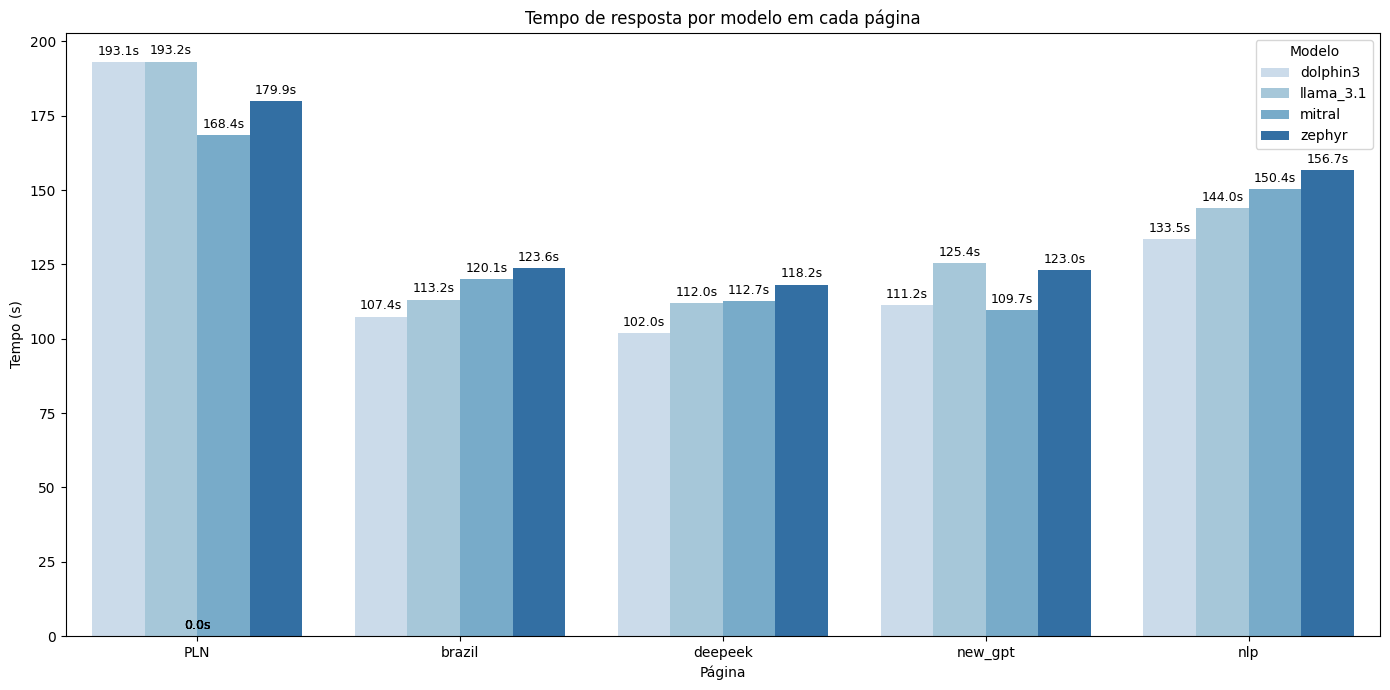

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular tempo médio de execução por linha
df['avg_time'] = df[[col for col in df.columns if col.startswith("time_")]].mean(axis=1)

# Agrupar por página e modelo
df_grouped = df.groupby(['page', 'model'], as_index=False)['avg_time'].sum()

# Paleta de tons de azul personalizados para os modelos
azul_personalizado = ["#c6dbef", "#9ecae1", "#6baed6", "#2171b5"]  # 4 tons de azul

# Criar o gráfico
fig, ax = plt.subplots(figsize=(14, 7))
barplot = sns.barplot(
    data=df_grouped,
    x='page',
    y='avg_time',
    hue='model',
    palette=azul_personalizado,
    ax=ax
)

# Adicionar os valores no topo das barras
for p in barplot.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}s',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3),
                textcoords='offset points')

# Ajustes finais
ax.set_title('Tempo de resposta por modelo em cada página')
ax.set_ylabel('Tempo (s)')
ax.set_xlabel('Página')
ax.legend(title='Modelo')
plt.tight_layout()

# Salvar se desejar
# fig.savefig("grafico_resposta_modelo_paginas.png")
# fig.savefig("grafico_resposta_modelo_paginas.pdf")

plt.show()

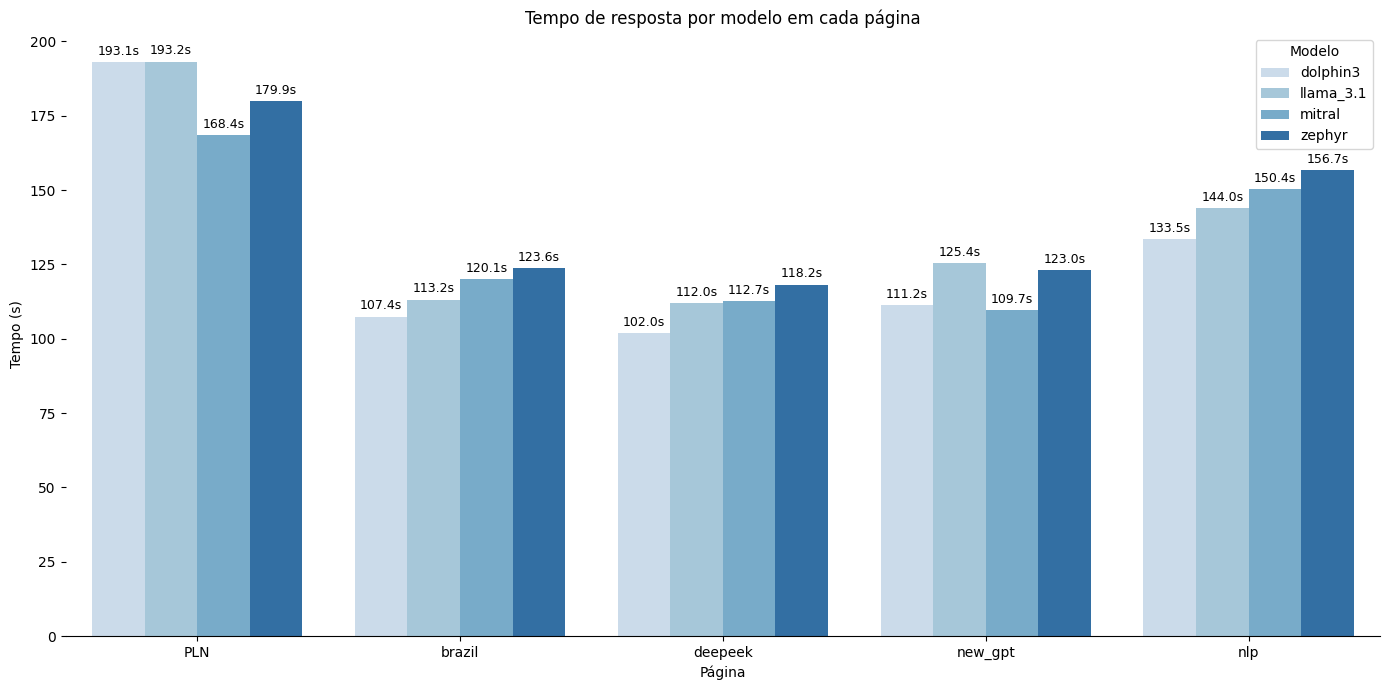

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular tempo médio de execução por linha
df['avg_time'] = df[[col for col in df.columns if col.startswith("time_")]].astype(float).mean(axis=1)

# Agrupar por página e modelo
df_grouped = df.groupby(['page', 'model'], as_index=False)['avg_time'].sum()

# Paleta de tons de azul personalizados para os modelos
azul_personalizado = ["#c6dbef", "#9ecae1", "#6baed6", "#2171b5"]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(14, 7))
barplot = sns.barplot(
    data=df_grouped,
    x='page',
    y='avg_time',
    hue='model',
    palette=azul_personalizado,
    ax=ax
)

# Adicionar os valores no topo das barras
for p in barplot.patches:
    height = p.get_height()
    # Ignorar barras com altura 0
    if height > 0:
        ax.annotate(f'{height:.1f}s',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, xytext=(0, 3),
                    textcoords='offset points')

# Ajustes visuais — remover bordas superior e direita
sns.despine(top=True, right=True, left=True)

# Remover a moldura da legenda (opcional)
ax.legend(title='Modelo', frameon=True)

# Títulos e eixos
ax.set_title('Tempo de resposta por modelo em cada página')
ax.set_ylabel('Tempo (s)')
ax.set_xlabel('Página')
plt.tight_layout()

# Exibir o gráfico
plt.show()

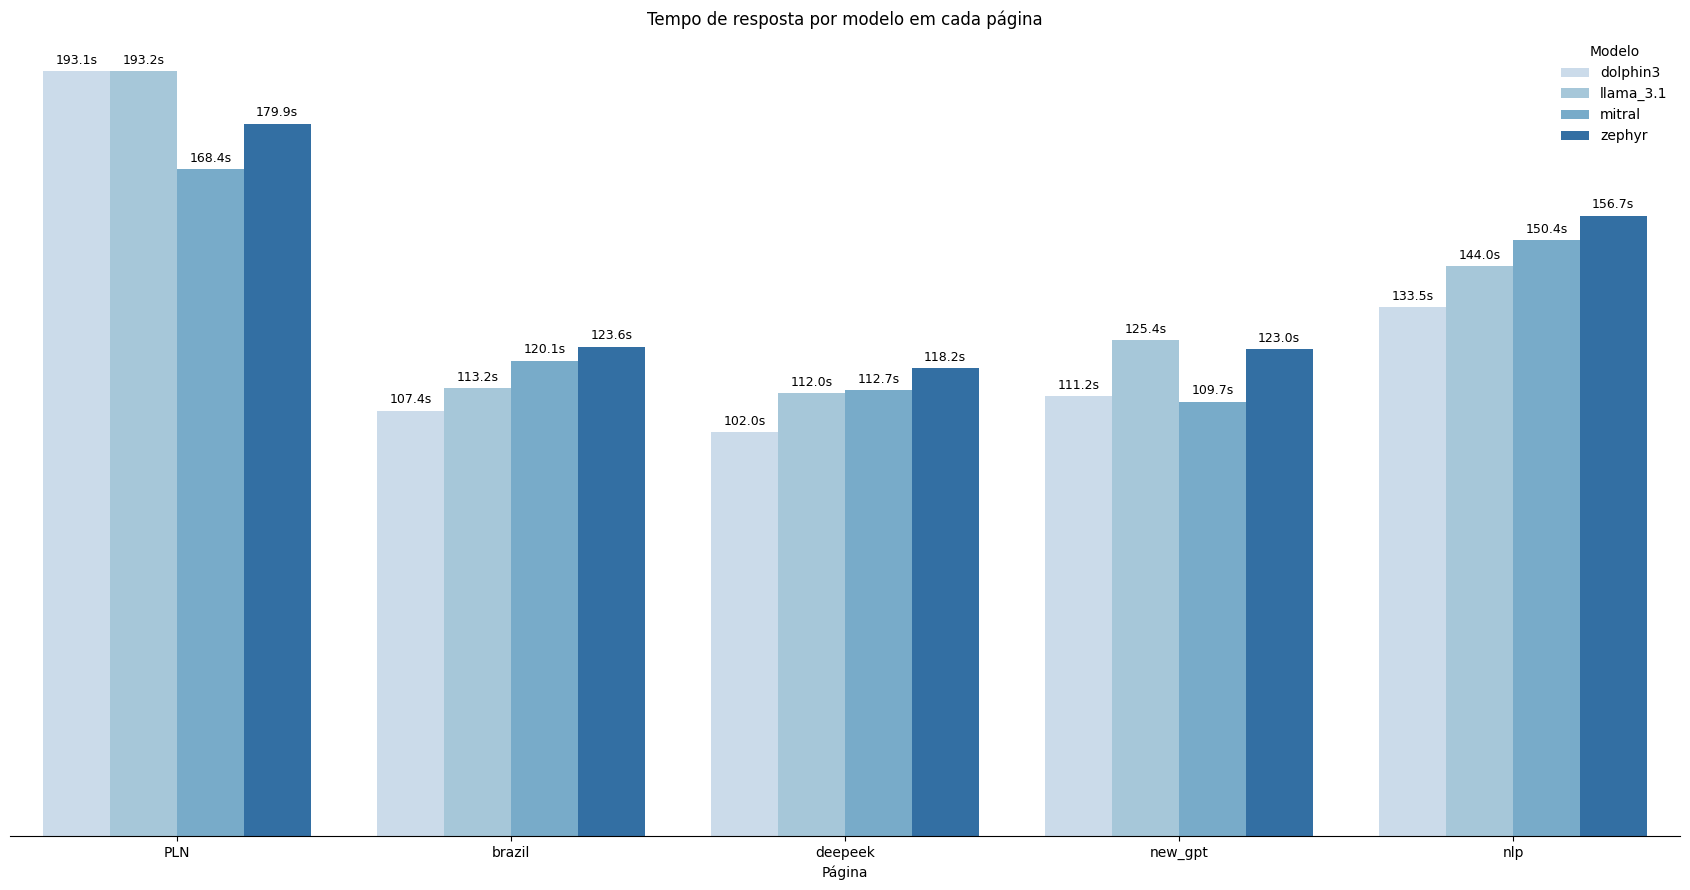

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular tempo médio de execução por linha
df['avg_time'] = df[[col for col in df.columns if col.startswith("time_")]].astype(float).mean(axis=1)

# Agrupar por página e modelo
df_grouped = df.groupby(['page', 'model'], as_index=False)['avg_time'].sum()

# Paleta de tons de azul personalizados para os modelos
azul_personalizado = ["#c6dbef", "#9ecae1", "#6baed6", "#2171b5"]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(17, 9))
barplot = sns.barplot(
    data=df_grouped,
    x='page',
    y='avg_time',
    hue='model',
    palette=azul_personalizado,
    ax=ax
)

# Adicionar os valores no topo das barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}s',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, xytext=(0, 3),
                    textcoords='offset points')

# Remover os números da esquerda (eixo Y)
ax.set_yticks([])
ax.set_yticklabels([])

# Remover as bordas superior e direita
sns.despine(top=True, right=True, left=True)

# Remover moldura da legenda
ax.legend(title='Modelo', frameon=False)

# Título e eixos
ax.set_title('Tempo de resposta por modelo em cada página')
ax.set_ylabel('')
ax.set_xlabel('Página')
plt.tight_layout()

plt.show()

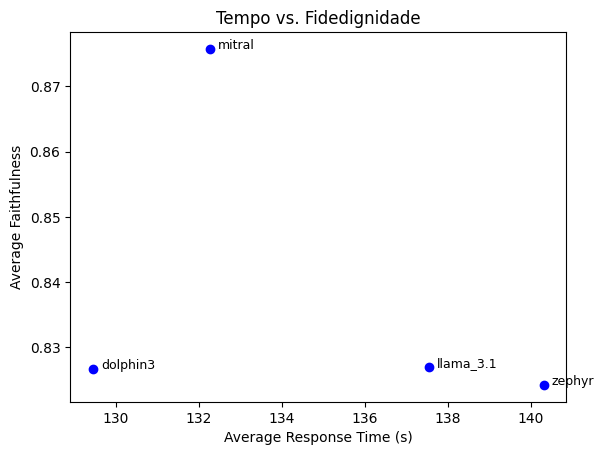

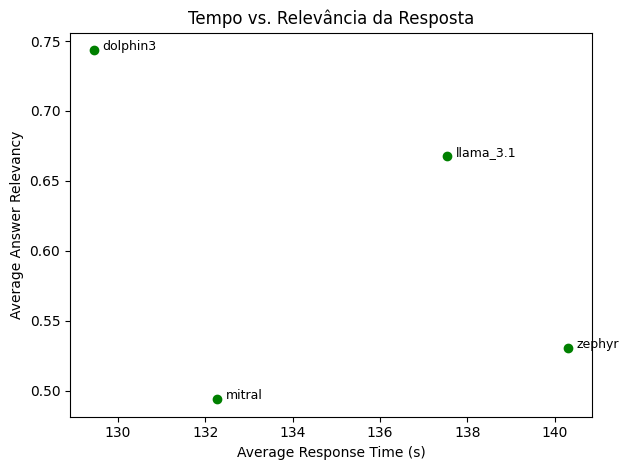

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv("perfomance_sem_s.csv")

# Pré-processamento
time_cols = ['time_1', 'time_2', 'time_3', 'time_4', 'time_5']

df['avg_time'] = df[time_cols].mean(axis=1)

# Agrupamento por modelo
model_means = df.groupby('model', as_index=False).agg({
    'faithfulness': 'mean',
    'answer_relevancy': 'mean',
    'avg_time': 'mean'
})

# Scatter plot: Tempo vs Faithfulness com anotação
fig, ax1 = plt.subplots()
for _, row in model_means.iterrows():
    ax1.scatter(row['avg_time'], row['faithfulness'], color='blue')
    ax1.text(row['avg_time'] + 0.2, row['faithfulness'], row['model'], fontsize=9)
ax1.set_title('Tempo vs. Fidedignidade')
ax1.set_xlabel('Average Response Time (s)')
ax1.set_ylabel('Average Faithfulness')

# Scatter plot: Tempo vs Relevância com anotação
fig, ax2 = plt.subplots()
for _, row in model_means.iterrows():
    ax2.scatter(row['avg_time'], row['answer_relevancy'], color='green')
    ax2.text(row['avg_time'] + 0.2, row['answer_relevancy'], row['model'], fontsize=9)
ax2.set_title('Tempo vs. Relevância da Resposta')
ax2.set_xlabel('Average Response Time (s)')
ax2.set_ylabel('Average Answer Relevancy')

plt.tight_layout()
plt.show()

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_29578/1847319534.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_score   = df.groupby('Página')['Score'].sum()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_29578/1847319534.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_faith  = df.groupby('Página')['faithfulness'].mean()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_29578/1847319534.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

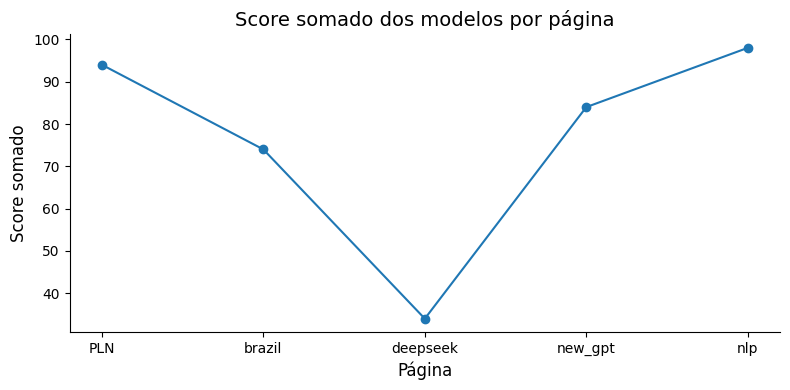

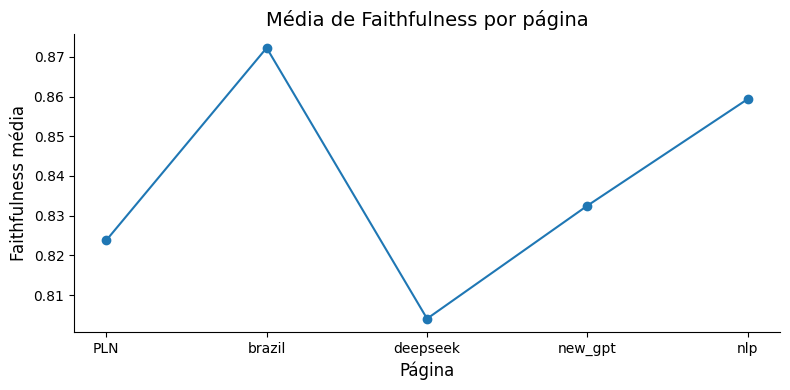

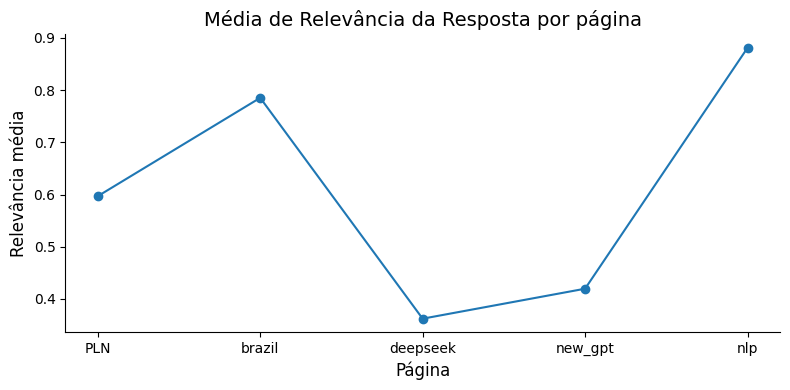

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carregar os dados
df = pd.read_csv('perfomance_sem_s.csv')

# 2) Padronizar nome da coluna de página e corrigir typo
df = df.rename(columns={'page': 'Página'})
df['Página'] = df['Página'].replace({'deepeek': 'deepseek'})

# 3) Ordenar as páginas na sequência desejada
ordem = ['PLN', 'brazil', 'deepseek', 'new_gpt', 'nlp']
df['Página'] = pd.Categorical(df['Página'], categories=ordem, ordered=True)

# 4) Calcular agregações por página
sum_score   = df.groupby('Página')['Score'].sum()
mean_faith  = df.groupby('Página')['faithfulness'].mean()
mean_relev  = df.groupby('Página')['answer_relevancy'].mean()

# Função auxiliar para plotar e limpar bordas
def plot_line(x, y, title, ylabel, fname=None):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, y, marker='o')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Página', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if fname:
        plt.savefig(fname, dpi=300)
    plt.show()

# 5) Plotar cada métrica separadamente
plot_line(sum_score.index, sum_score.values,
          'Score somado dos modelos por página',
          'Score somado',
          fname='score_somado_new.png')

plot_line(mean_faith.index, mean_faith.values,
          'Média de Faithfulness por página',
          'Faithfulness média',
          fname='faithfulness_media_new.png')

plot_line(mean_relev.index, mean_relev.values,
          'Média de Relevância da Resposta por página',
          'Relevância média',
          fname='relevancia_media_new.png')

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/4246499736.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_score   = df.groupby('Página')['Score'].sum()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/4246499736.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_faith  = df.groupby('Página')['faithfulness'].mean()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/4246499736.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

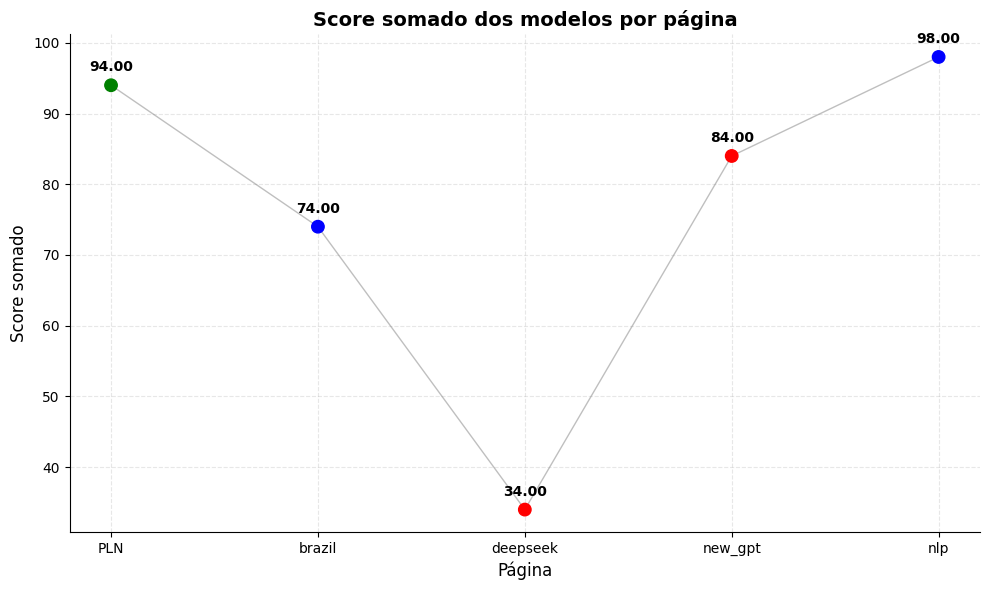

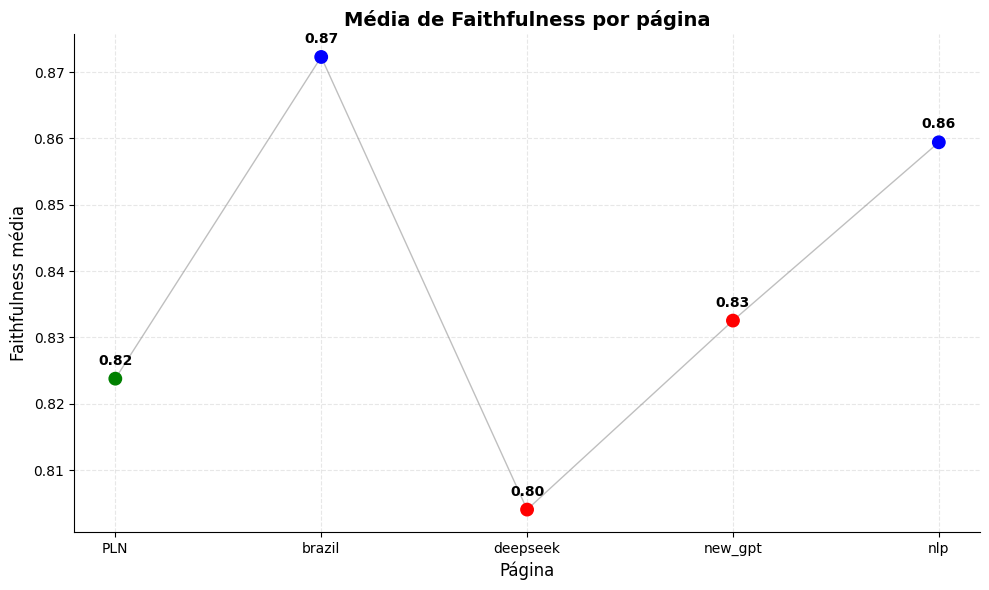

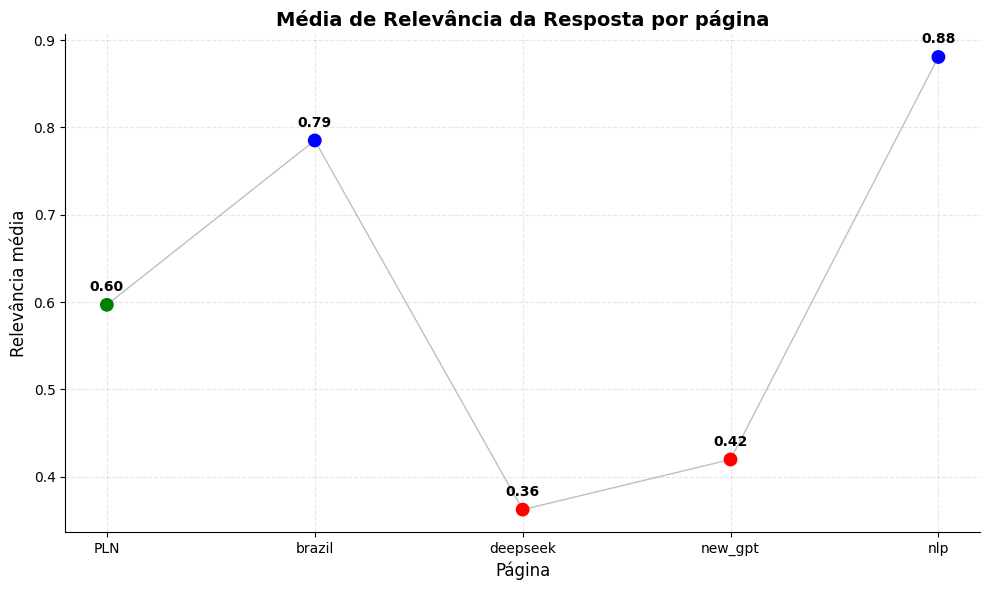

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carregar os dados
df = pd.read_csv('perfomance_sem_s.csv')

# 2) Padronizar nome da coluna de página e corrigir typo
df = df.rename(columns={'page': 'Página'})
df['Página'] = df['Página'].replace({'deepeek': 'deepseek'})

# 3) Ordenar as páginas na sequência desejada
ordem = ['PLN', 'brazil', 'deepseek', 'new_gpt', 'nlp']
df['Página'] = pd.Categorical(df['Página'], categories=ordem, ordered=True)

# 4) Calcular agregações por página
sum_score   = df.groupby('Página')['Score'].sum()
mean_faith  = df.groupby('Página')['faithfulness'].mean()
mean_relev  = df.groupby('Página')['answer_relevancy'].mean()

# Função auxiliar para plotar com melhorias
def plot_line_improved(x, y, title, ylabel, fname=None):
    # Definir cores personalizadas
    colors = []
    for page in x:
        if page == 'PLN':
            colors.append('green')
        elif page in ['deepseek', 'new_gpt']:
            colors.append('red')
        else:
            colors.append('blue')
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotar linha com pontos coloridos
    ax.plot(x, y, color='gray', alpha=0.5, linewidth=1)
    ax.scatter(x, y, c=colors, s=80, zorder=5)
    
    # Adicionar valores acima dos pontos
    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.annotate(f'{yi:.2f}', 
                   (xi, yi), 
                   textcoords="offset points", 
                   xytext=(0,10), 
                   ha='center',
                   fontsize=10,
                   fontweight='bold')
    
    # Configurações do gráfico
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Página', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    # Adicionar grade
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Remover bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Ajustar layout
    plt.tight_layout()
    
    # Salvar se especificado
    if fname:
        plt.savefig(fname, dpi=300, bbox_inches='tight')
    
    plt.show()

# 5) Plotar cada métrica separadamente com melhorias
plot_line_improved(sum_score.index, sum_score.values,
                  'Score somado dos modelos por página',
                  'Score somado',
                  fname='score_somado_new.png')

plot_line_improved(mean_faith.index, mean_faith.values,
                  'Média de Faithfulness por página',
                  'Faithfulness média',
                  fname='faithfulness_media_new.png')

plot_line_improved(mean_relev.index, mean_relev.values,
                  'Média de Relevância da Resposta por página',
                  'Relevância média',
                  fname='relevancia_media_new.png')

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/3132739338.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_score   = df.groupby('Página')['Score'].sum()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/3132739338.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_faith  = df.groupby('Página')['faithfulness'].mean()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/3132739338.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

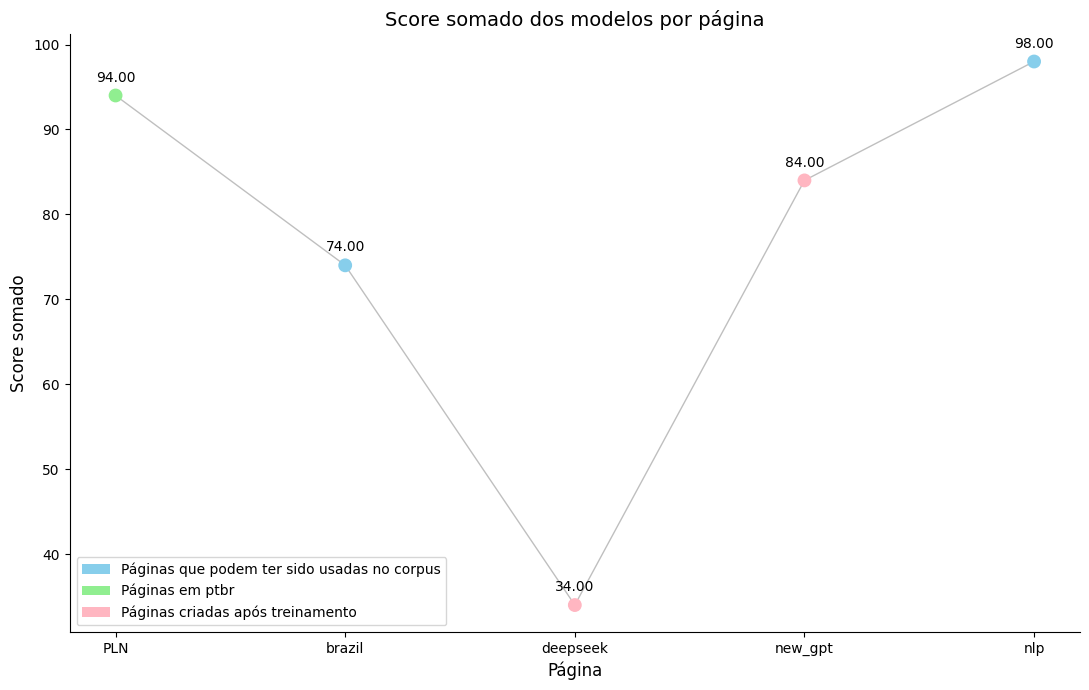

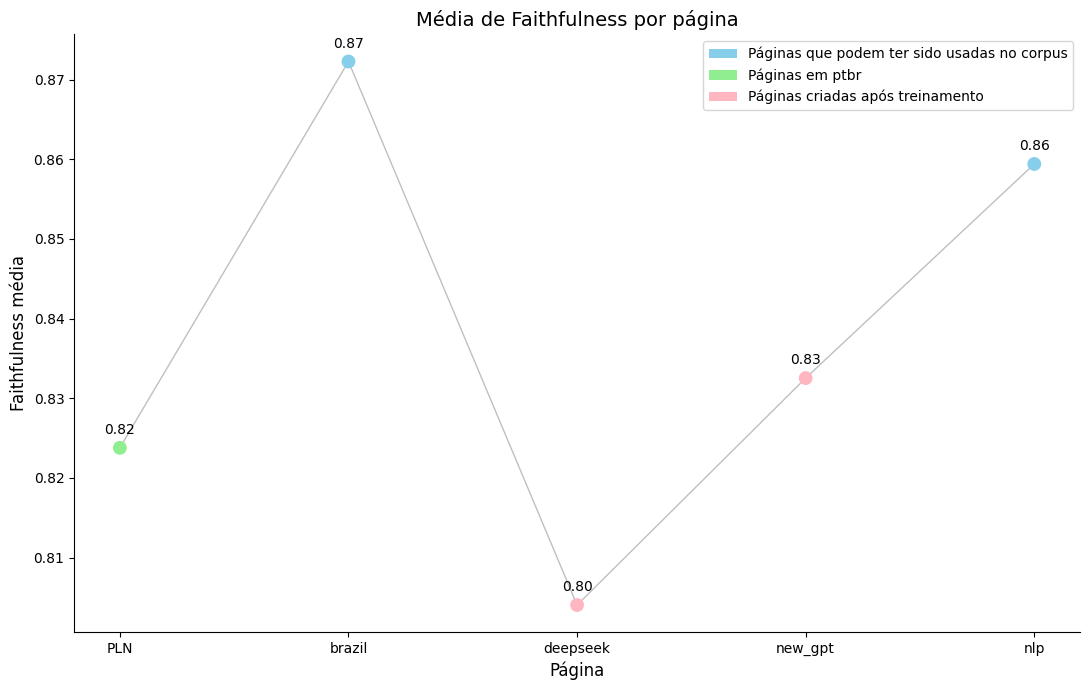

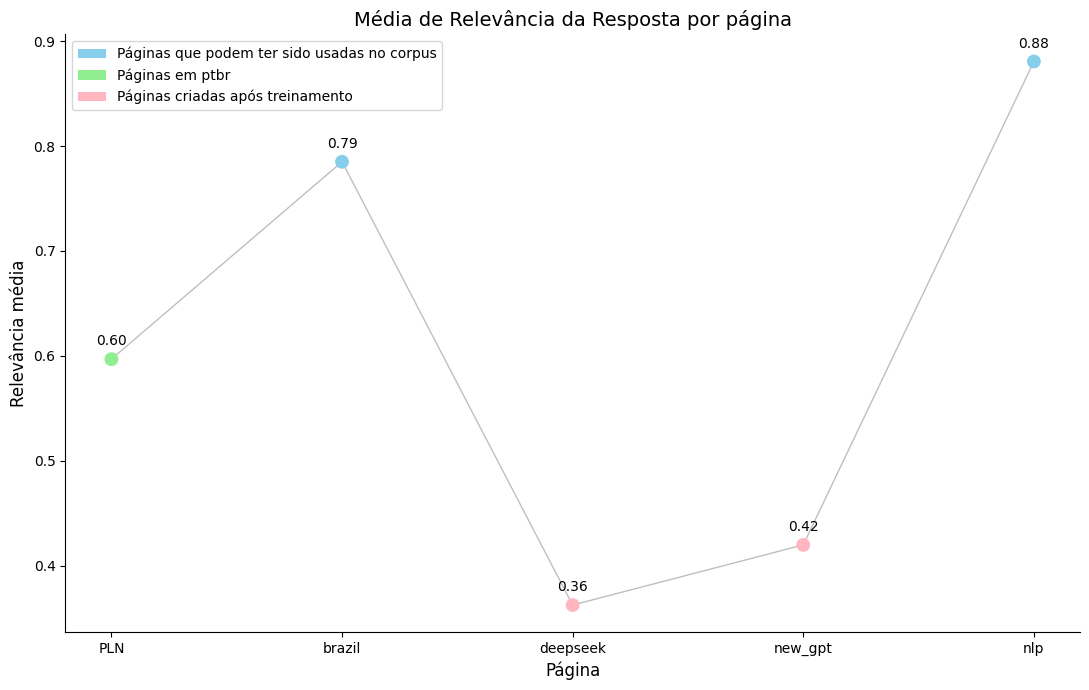

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carregar os dados
df = pd.read_csv('perfomance_sem_s.csv')

# 2) Padronizar nome da coluna de página e corrigir typo
df = df.rename(columns={'page': 'Página'})
df['Página'] = df['Página'].replace({'deepeek': 'deepseek'})

# 3) Ordenar as páginas na sequência desejada
ordem = ['PLN', 'brazil', 'deepseek', 'new_gpt', 'nlp']
df['Página'] = pd.Categorical(df['Página'], categories=ordem, ordered=True)

# 4) Calcular agregações por página
sum_score   = df.groupby('Página')['Score'].sum()
mean_faith  = df.groupby('Página')['faithfulness'].mean()
mean_relev  = df.groupby('Página')['answer_relevancy'].mean()

# Função auxiliar para plotar com melhorias
def plot_line_improved(x, y, title, ylabel, fname=None):
    # Definir cores personalizadas (suavizadas)
    colors = []
    for page in x:
        if page == 'PLN':
            colors.append('#90EE90')  # Verde claro
        elif page in ['deepseek', 'new_gpt']:
            colors.append('#FFB6C1')  # Rosa/vermelho claro
        else:
            colors.append('#87CEEB')  # Azul claro
    
    fig, ax = plt.subplots(figsize=(11, 7))
    
    # Plotar linha com pontos coloridos
    ax.plot(x, y, color='gray', alpha=0.5, linewidth=1)
    ax.scatter(x, y, c=colors, s=80, zorder=5)
    
    # Adicionar valores acima dos pontos
    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.annotate(f'{yi:.2f}', 
                   (xi, yi), 
                   textcoords="offset points", 
                   xytext=(0,10), 
                   ha='center',
                   fontsize=10,
                   fontweight='normal')
    
    # Configurações do gráfico
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_xlabel('Página', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    # Adicionar grade
    #ax.grid(True, alpha=0.3, linestyle='--')
    
    # Remover bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Criar legenda personalizada
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#87CEEB', label='Páginas que podem ter sido usadas no corpus'),
        Patch(facecolor='#90EE90', label='Páginas em ptbr'),
        Patch(facecolor='#FFB6C1', label='Páginas criadas após treinamento')
    ]
    ax.legend(handles=legend_elements, loc='best') #, bbox_to_anchor=(0.02, 0.98)
    
    # Ajustar layout
    plt.tight_layout()
    
    # Salvar se especificado
    if fname:
        plt.savefig(fname, dpi=300, bbox_inches='tight')
    
    plt.show()

# 5) Plotar cada métrica separadamente com melhorias
plot_line_improved(sum_score.index, sum_score.values,
                  'Score somado dos modelos por página',
                  'Score somado',
                  fname='score_somado_new.png')

plot_line_improved(mean_faith.index, mean_faith.values,
                  'Média de Faithfulness por página',
                  'Faithfulness média',
                  fname='faithfulness_media_new.png')

plot_line_improved(mean_relev.index, mean_relev.values,
                  'Média de Relevância da Resposta por página',
                  'Relevância média',
                  fname='relevancia_media_new.png')

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/3732243933.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_score   = df.groupby('Página')['Score'].sum()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/3732243933.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_faith  = df.groupby('Página')['faithfulness'].mean()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/3732243933.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

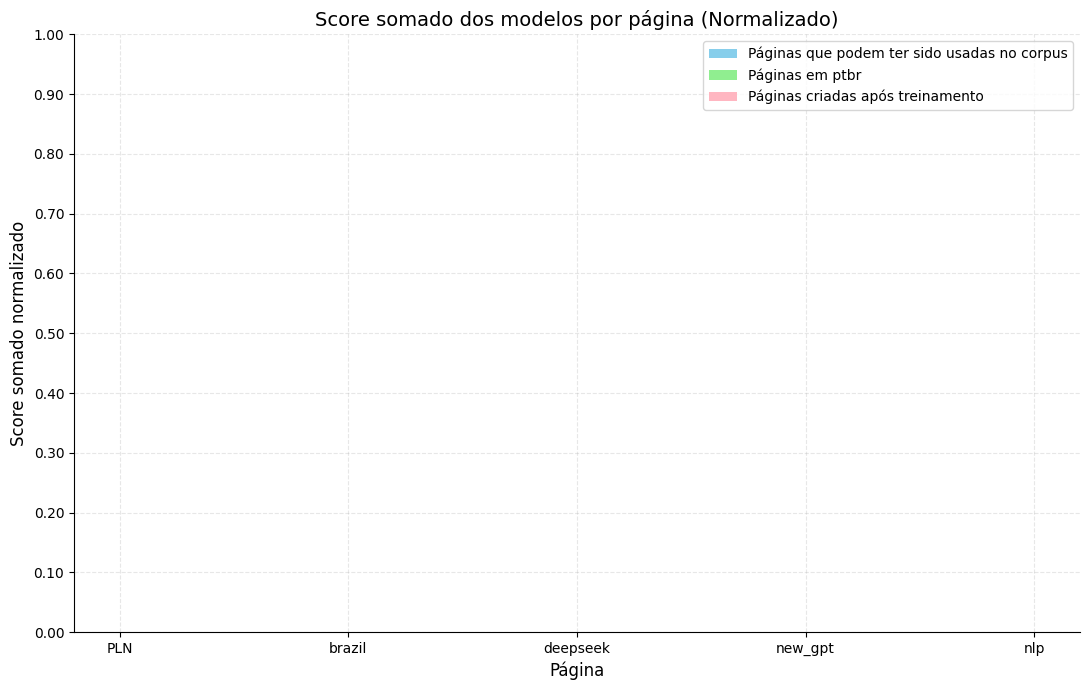

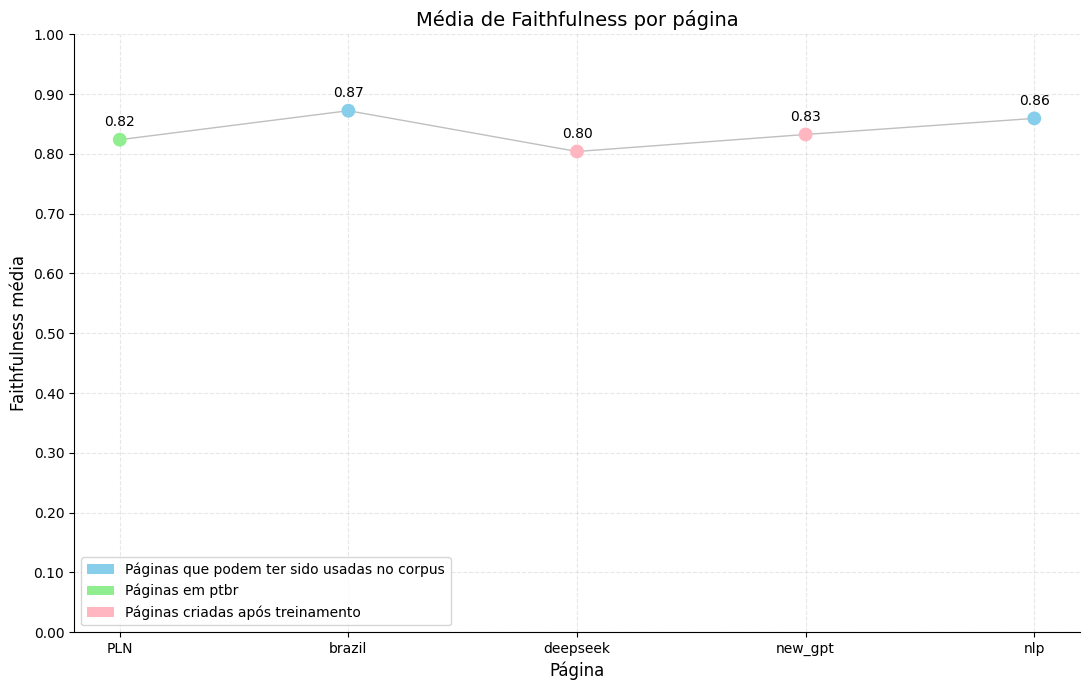

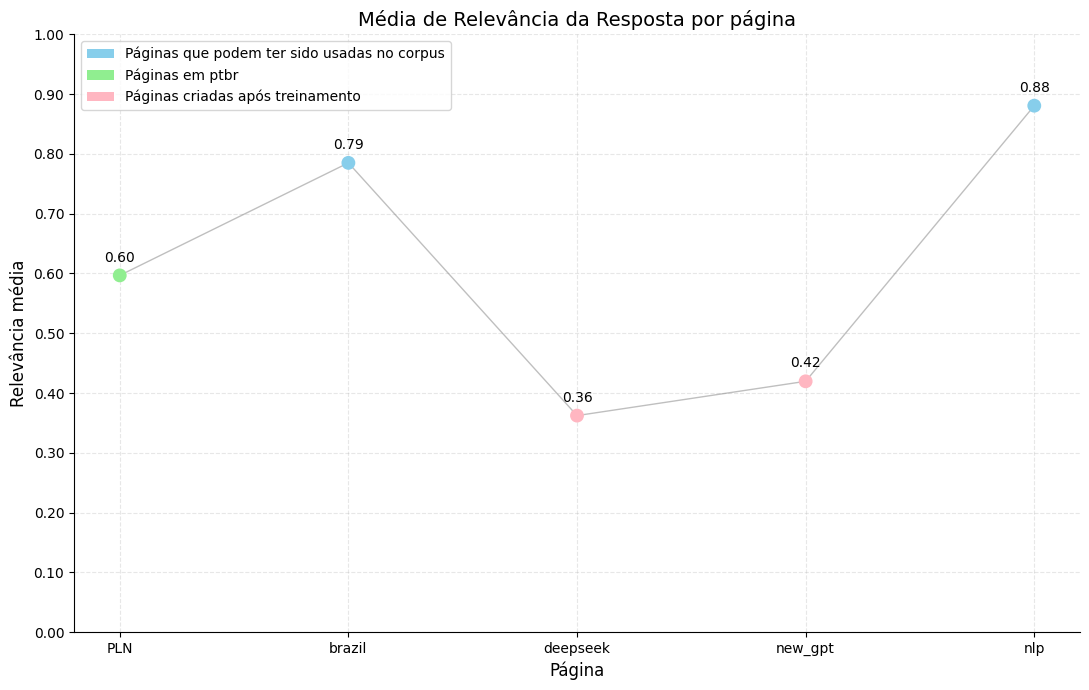

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Carregar os dados
df = pd.read_csv('perfomance_sem_s.csv')

# 2) Padronizar nome da coluna de página e corrigir typo
df = df.rename(columns={'page': 'Página'})
df['Página'] = df['Página'].replace({'deepeek': 'deepseek'})

# 3) Ordenar as páginas na sequência desejada
ordem = ['PLN', 'brazil', 'deepseek', 'new_gpt', 'nlp']
df['Página'] = pd.Categorical(df['Página'], categories=ordem, ordered=True)

# 4) Calcular agregações por página
sum_score   = df.groupby('Página')['Score'].sum()
mean_faith  = df.groupby('Página')['faithfulness'].mean()
mean_relev  = df.groupby('Página')['answer_relevancy'].mean()

# Função auxiliar para plotar com melhorias
def plot_line_improved(x, y, title, ylabel, fname=None, normalize_score=False):
    # Definir cores personalizadas (suavizadas)
    colors = []
    for page in x:
        if page == 'PLN':
            colors.append('#90EE90')  # Verde claro
        elif page in ['deepseek', 'new_gpt']:
            colors.append('#FFB6C1')  # Rosa/vermelho claro
        else:
            colors.append('#87CEEB')  # Azul claro
    
    fig, ax = plt.subplots(figsize=(11, 7))
    
    # Normalizar valores do Score se necessário
    y_plot = y.copy()
    if normalize_score:
        # Normalizar para escala 0-1
        y_min, y_max = y.min(), y.max()
        y_plot = (y - y_min) / (y_max - y_min)
    
    # Plotar linha com pontos coloridos
    ax.plot(x, y_plot, color='gray', alpha=0.5, linewidth=1)
    ax.scatter(x, y_plot, c=colors, s=80, zorder=5)
    
    # Adicionar valores acima dos pontos
    for i, (xi, yi) in enumerate(zip(x, y_plot)):
        ax.annotate(f'{yi:.2f}', 
                   (xi, yi), 
                   textcoords="offset points", 
                   xytext=(0,10), 
                   ha='center',
                   fontsize=10,
                   fontweight='normal')
    
    # Configurações do gráfico
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_xlabel('Página', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    # Definir escala do eixo Y de 0.00 a 1.00
    ax.set_ylim(0.00, 1.00)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_yticklabels([f'{i:.2f}' for i in np.arange(0, 1.1, 0.1)])
    
    # Adicionar grade
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Remover bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Criar legenda personalizada
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#87CEEB', label='Páginas que podem ter sido usadas no corpus'),
        Patch(facecolor='#90EE90', label='Páginas em ptbr'),
        Patch(facecolor='#FFB6C1', label='Páginas criadas após treinamento')
    ]
    ax.legend(handles=legend_elements, loc='best')
    
    # Ajustar layout
    plt.tight_layout()
    
    # Salvar se especificado
    if fname:
        plt.savefig(fname, dpi=300, bbox_inches='tight')
    
    plt.show()

# 5) Plotar cada métrica separadamente com melhorias
plot_line_improved(sum_score.index, sum_score.values,
                  'Score somado dos modelos por página (Normalizado)',
                  'Score somado normalizado',
                  fname='score_somado_new.png',
                  normalize_score=False)

plot_line_improved(mean_faith.index, mean_faith.values,
                  'Média de Faithfulness por página',
                  'Faithfulness média',
                  fname='faithfulness_media_new.png')

plot_line_improved(mean_relev.index, mean_relev.values,
                  'Média de Relevância da Resposta por página',
                  'Relevância média',
                  fname='relevancia_media_new.png')

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/473428825.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_score   = df.groupby('Página')['Score'].sum()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/473428825.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_faith  = df.groupby('Página')['faithfulness'].mean()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/473428825.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

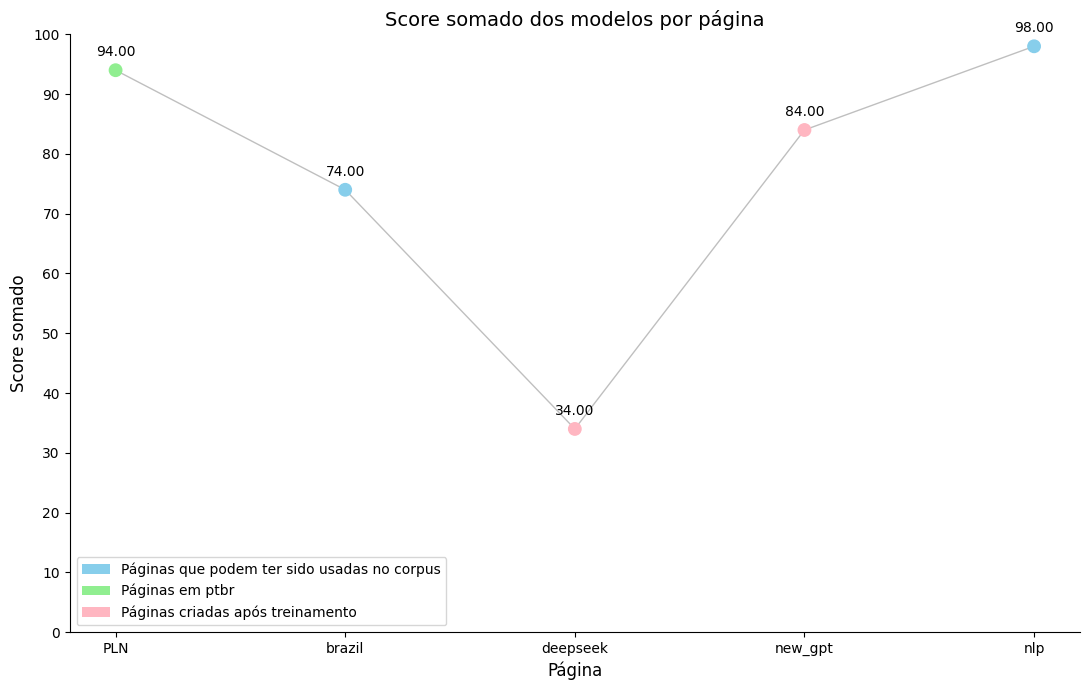

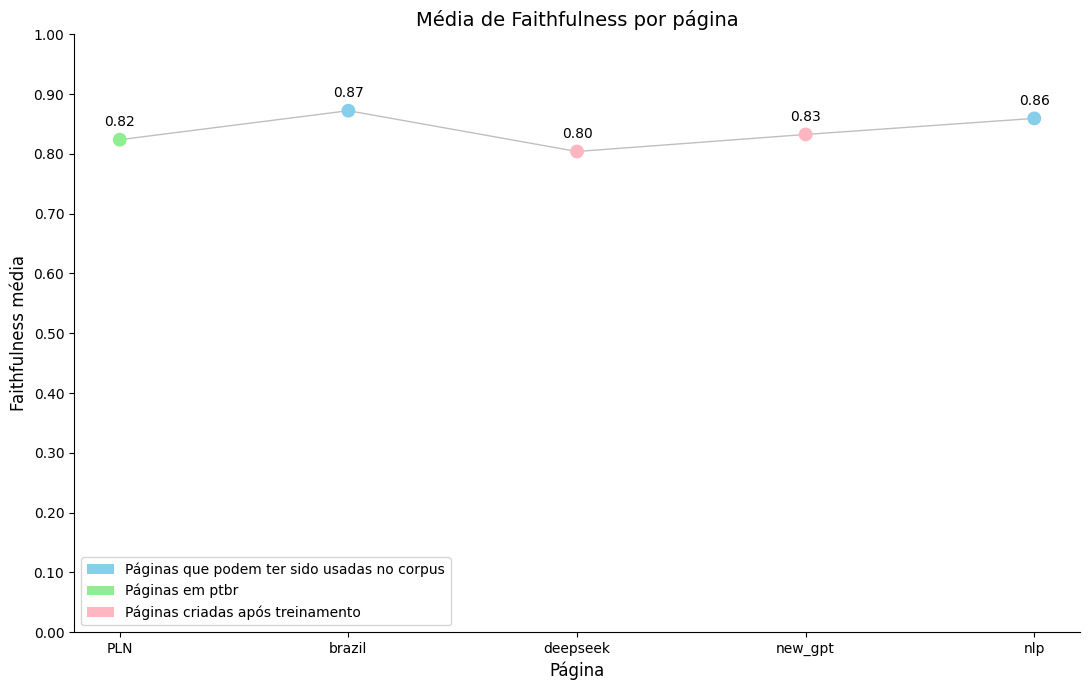

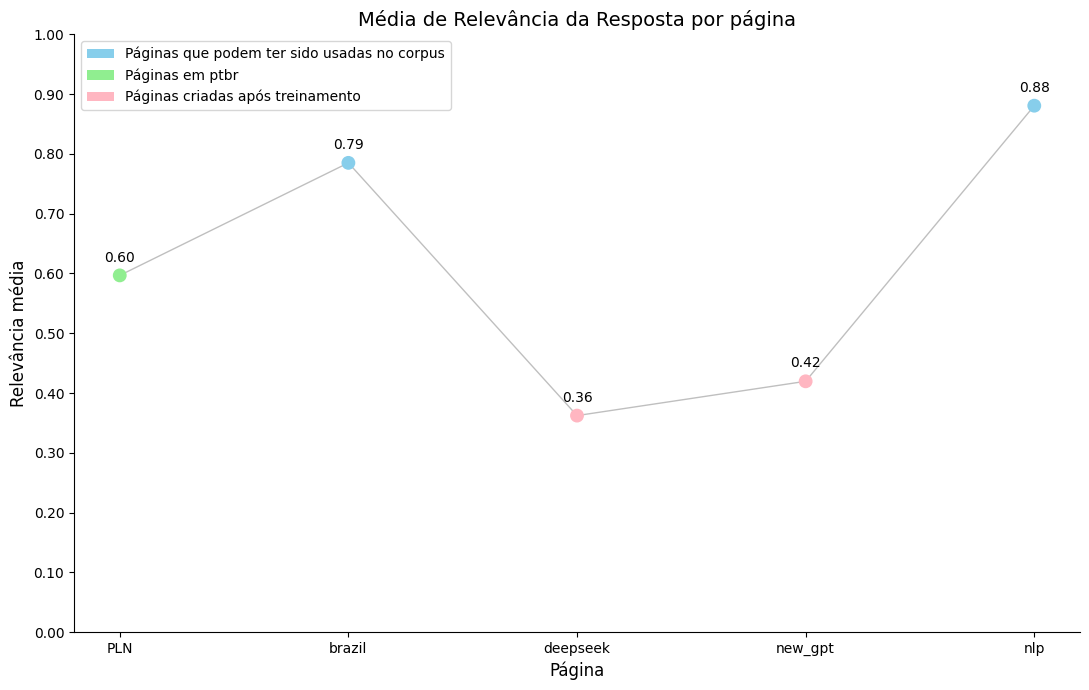

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Carregar os dados
df = pd.read_csv('perfomance_sem_s.csv')

# 2) Padronizar nome da coluna de página e corrigir typo
df = df.rename(columns={'page': 'Página'})
df['Página'] = df['Página'].replace({'deepeek': 'deepseek'})

# 3) Ordenar as páginas na sequência desejada
ordem = ['PLN', 'brazil', 'deepseek', 'new_gpt', 'nlp']
df['Página'] = pd.Categorical(df['Página'], categories=ordem, ordered=True)

# 4) Calcular agregações por página
sum_score   = df.groupby('Página')['Score'].sum()
mean_faith  = df.groupby('Página')['faithfulness'].mean()
mean_relev  = df.groupby('Página')['answer_relevancy'].mean()

# Função auxiliar para plotar com melhorias
def plot_line_improved(x, y, title, ylabel, fname=None, scale_type='0-1'):
    # Definir cores personalizadas (suavizadas)
    colors = []
    for page in x:
        if page == 'PLN':
            colors.append('#90EE90')  # Verde claro
        elif page in ['deepseek', 'new_gpt']:
            colors.append('#FFB6C1')  # Rosa/vermelho claro
        else:
            colors.append('#87CEEB')  # Azul claro
    
    fig, ax = plt.subplots(figsize=(11, 7))
    
    # Plotar linha com pontos coloridos (dados originais)
    ax.plot(x, y, color='gray', alpha=0.5, linewidth=1)
    ax.scatter(x, y, c=colors, s=80, zorder=5)
    
    # Adicionar valores acima dos pontos
    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.annotate(f'{yi:.2f}', 
                   (xi, yi), 
                   textcoords="offset points", 
                   xytext=(0,10), 
                   ha='center',
                   fontsize=10,
                   fontweight='normal')
    
    # Configurações do gráfico
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_xlabel('Página', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    # Definir escala do eixo Y baseado no tipo
    if scale_type == '0-100':
        ax.set_ylim(0, 100)
        ax.set_yticks(np.arange(0, 101, 10))
        ax.set_yticklabels([f'{i}' for i in np.arange(0, 101, 10)])
    else:  # escala 0-1
        ax.set_ylim(0.00, 1.00)
        ax.set_yticks(np.arange(0, 1.1, 0.1))
        ax.set_yticklabels([f'{i:.2f}' for i in np.arange(0, 1.1, 0.1)])
    
    # Adicionar grade
    #ax.grid(True, alpha=0.3, linestyle='--')
    
    # Remover bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Criar legenda personalizada
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#87CEEB', label='Páginas que podem ter sido usadas no corpus'),
        Patch(facecolor='#90EE90', label='Páginas em ptbr'),
        Patch(facecolor='#FFB6C1', label='Páginas criadas após treinamento')
    ]
    ax.legend(handles=legend_elements, loc='best')
    
    # Ajustar layout
    plt.tight_layout()
    
    # Salvar se especificado
    if fname:
        plt.savefig(fname, dpi=300, bbox_inches='tight')
    
    plt.show()

# 5) Plotar cada métrica separadamente com melhorias
plot_line_improved(sum_score.index, sum_score.values,
                  'Score somado dos modelos por página',
                  'Score somado',
                  fname='score_somado_new.png',
                  scale_type='0-100')

plot_line_improved(mean_faith.index, mean_faith.values,
                  'Média de Faithfulness por página',
                  'Faithfulness média',
                  fname='faithfulness_media_new.png',
                  scale_type='0-1')

plot_line_improved(mean_relev.index, mean_relev.values,
                  'Média de Relevância da Resposta por página',
                  'Relevância média',
                  fname='relevancia_media_new.png',
                  scale_type='0-1')

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/1955556886.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metric_mean = df.groupby('Página')[metric].mean()


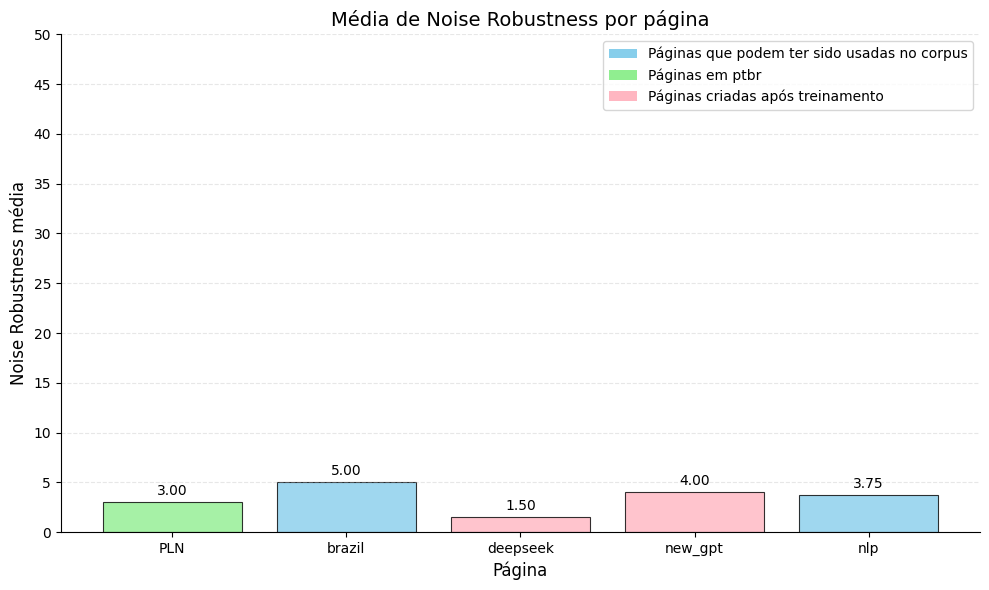

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/1955556886.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metric_mean = df.groupby('Página')[metric].mean()


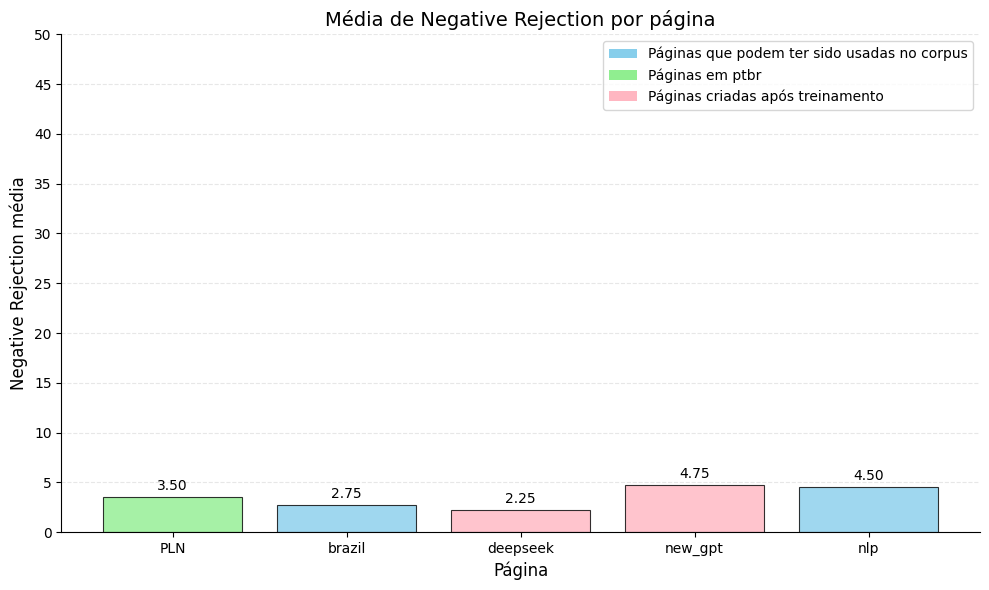

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/1955556886.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metric_mean = df.groupby('Página')[metric].mean()


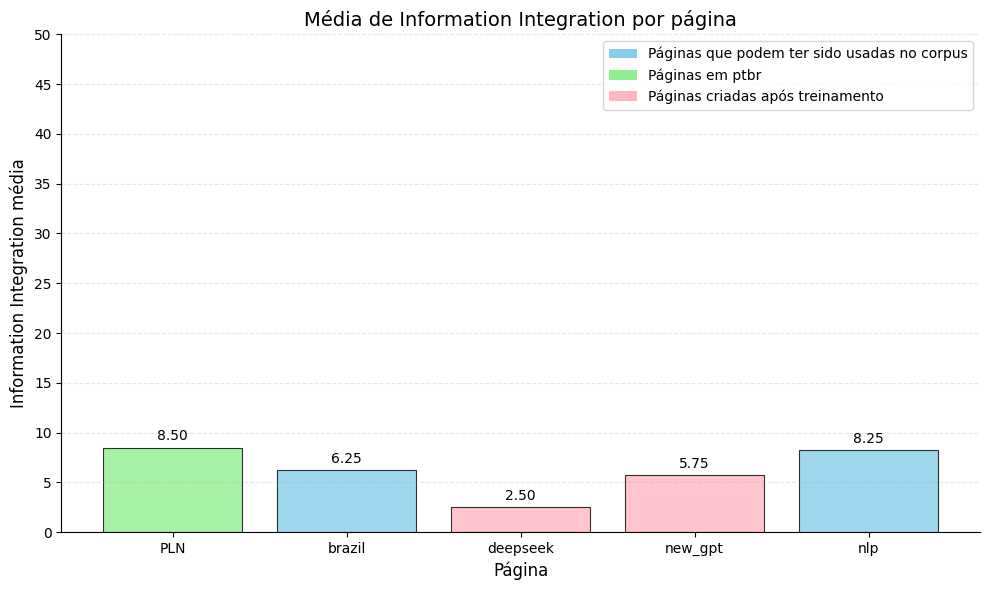

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/1955556886.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metric_mean = df.groupby('Página')[metric].mean()


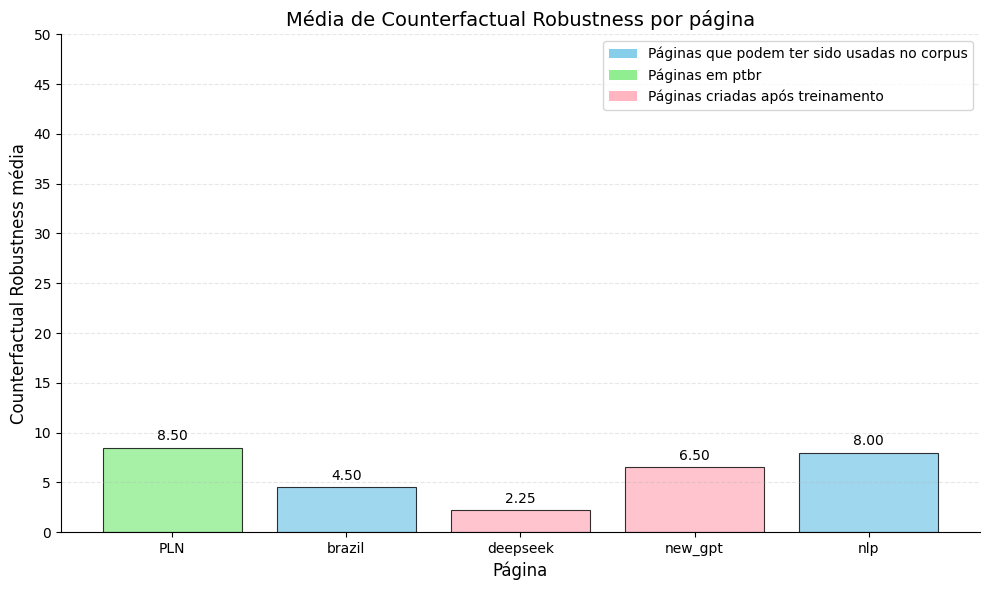

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Carregar os dados
df = pd.read_csv('perfomance_sem_s.csv')

# 2) Padronizar nome da coluna de página e corrigir typo
df = df.rename(columns={'page': 'Página'})
df['Página'] = df['Página'].replace({'deepeek': 'deepseek'})

# 3) Ordenar as páginas na sequência desejada
ordem = ['PLN', 'brazil', 'deepseek', 'new_gpt', 'nlp']
df['Página'] = pd.Categorical(df['Página'], categories=ordem, ordered=True)

# 4) Função para gráficos de barras das métricas específicas
def plot_metrics_bars(df, metrics_columns):
    """
    Cria gráficos de barras para cada métrica específica por página
    """
    for metric in metrics_columns:
        # Calcular média da métrica por página
        metric_mean = df.groupby('Página')[metric].mean()
        
        # Definir cores personalizadas
        colors = []
        for page in metric_mean.index:
            if page == 'PLN':
                colors.append('#90EE90')  # Verde claro
            elif page in ['deepseek', 'new_gpt']:
                colors.append('#FFB6C1')  # Rosa/vermelho claro
            else:
                colors.append('#87CEEB')  # Azul claro
        
        # Criar gráfico de barras
        fig, ax = plt.subplots(figsize=(10, 6))
        bars = ax.bar(metric_mean.index, metric_mean.values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.8)
        
        # Adicionar valores acima das barras
        for bar, value in zip(bars, metric_mean.values):
            height = bar.get_height()
            ax.annotate(f'{value:.2f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 pontos acima da barra
                       textcoords="offset points",
                       ha='center', va='bottom',
                       fontsize=10, fontweight='normal')
        
        # Configurações do gráfico
        ax.set_title(f'Média de {metric} por página', fontsize=14, fontweight='normal')
        ax.set_xlabel('Página', fontsize=12)
        ax.set_ylabel(f'{metric} média', fontsize=12)
        
        # Definir escala do eixo Y de 0 a 50
        ax.set_ylim(0, 50)
        ax.set_yticks(np.arange(0, 51, 5))
        ax.set_yticklabels([f'{i}' for i in np.arange(0, 51, 5)])
        
        # Adicionar grade horizontal
        ax.grid(True, alpha=0.3, linestyle='--', axis='y')
        
        # Remover bordas superior e direita
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Criar legenda personalizada
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='#87CEEB', label='Páginas que podem ter sido usadas no corpus'),
            Patch(facecolor='#90EE90', label='Páginas em ptbr'),
            Patch(facecolor='#FFB6C1', label='Páginas criadas após treinamento')
        ]
        ax.legend(handles=legend_elements, loc='best')
        
        # Ajustar layout
        plt.tight_layout()
        
        # Salvar gráfico
        filename = f'{metric.lower().replace(" ", "_")}_por_pagina.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        
        plt.show()

# 5) Criar gráficos de barras para as métricas específicas
metrics_to_plot = ['Noise Robustness', 'Negative Rejection', 'Information Integration', 'Counterfactual Robustness']
plot_metrics_bars(df, metrics_to_plot)

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/2282782927.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(values=metric, index='Página', columns='model', aggfunc='mean')


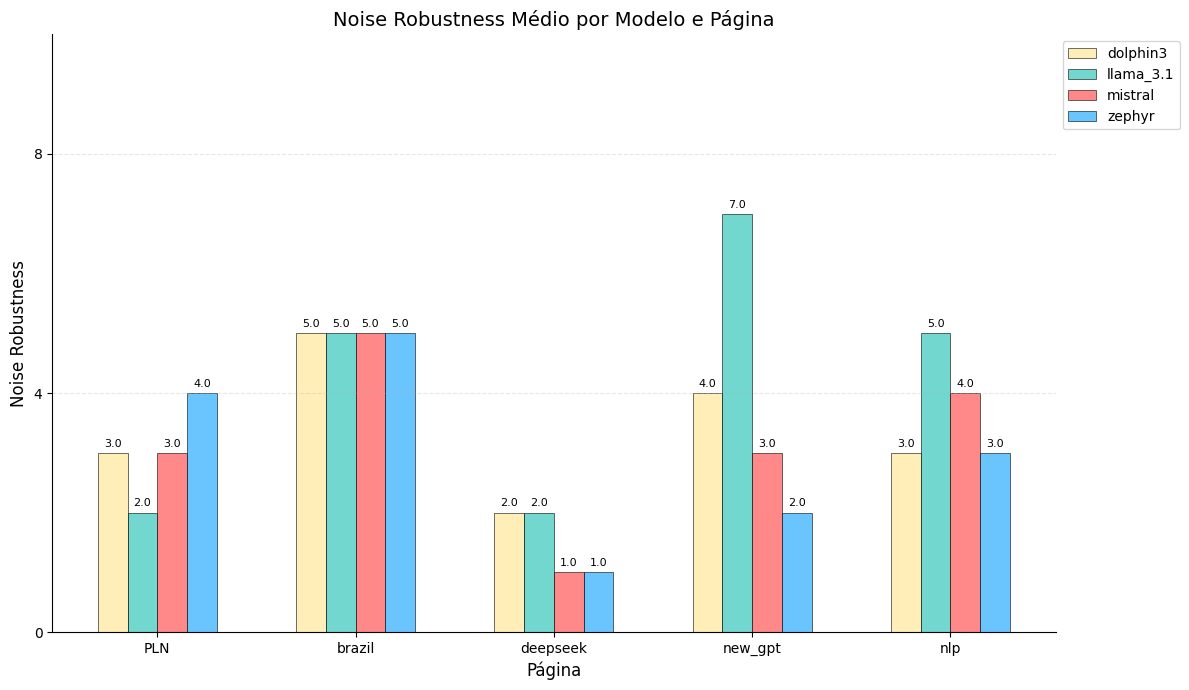

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/2282782927.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(values=metric, index='Página', columns='model', aggfunc='mean')


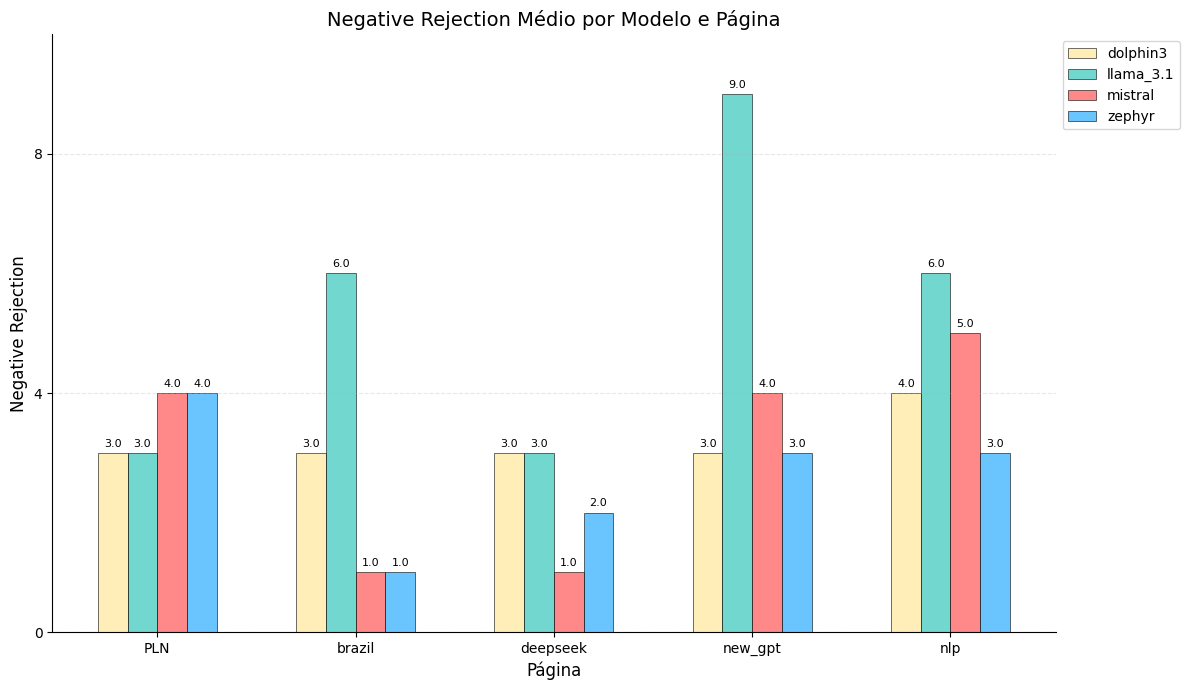

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/2282782927.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(values=metric, index='Página', columns='model', aggfunc='mean')


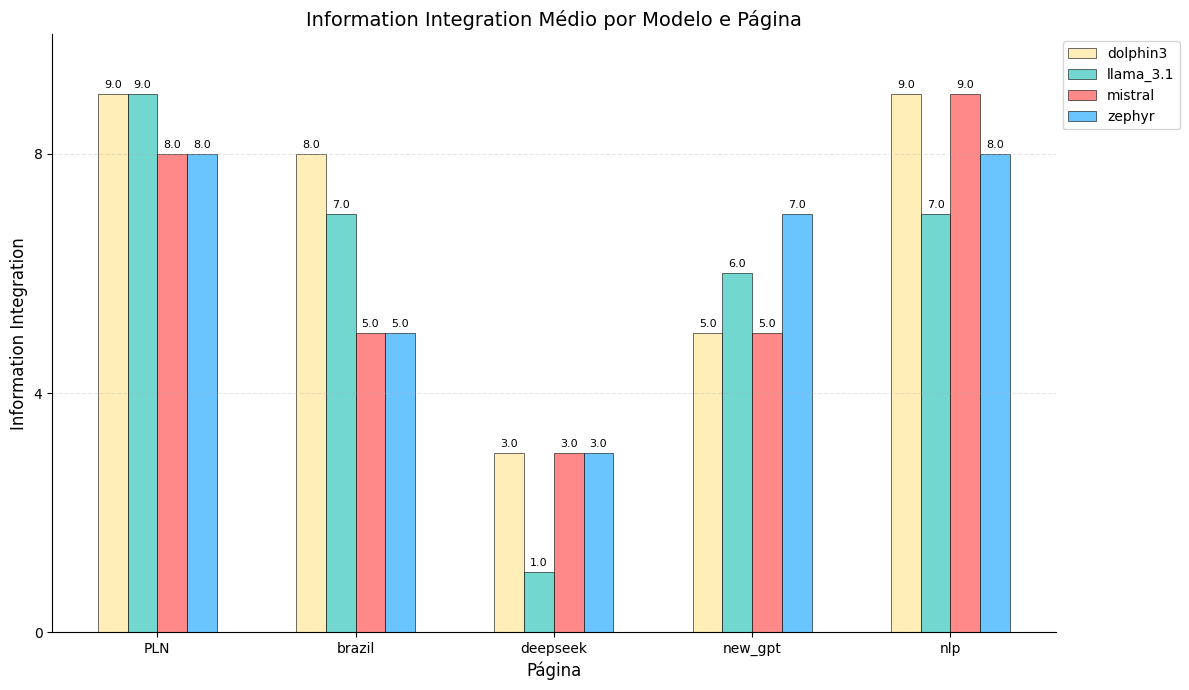

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_46310/2282782927.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(values=metric, index='Página', columns='model', aggfunc='mean')


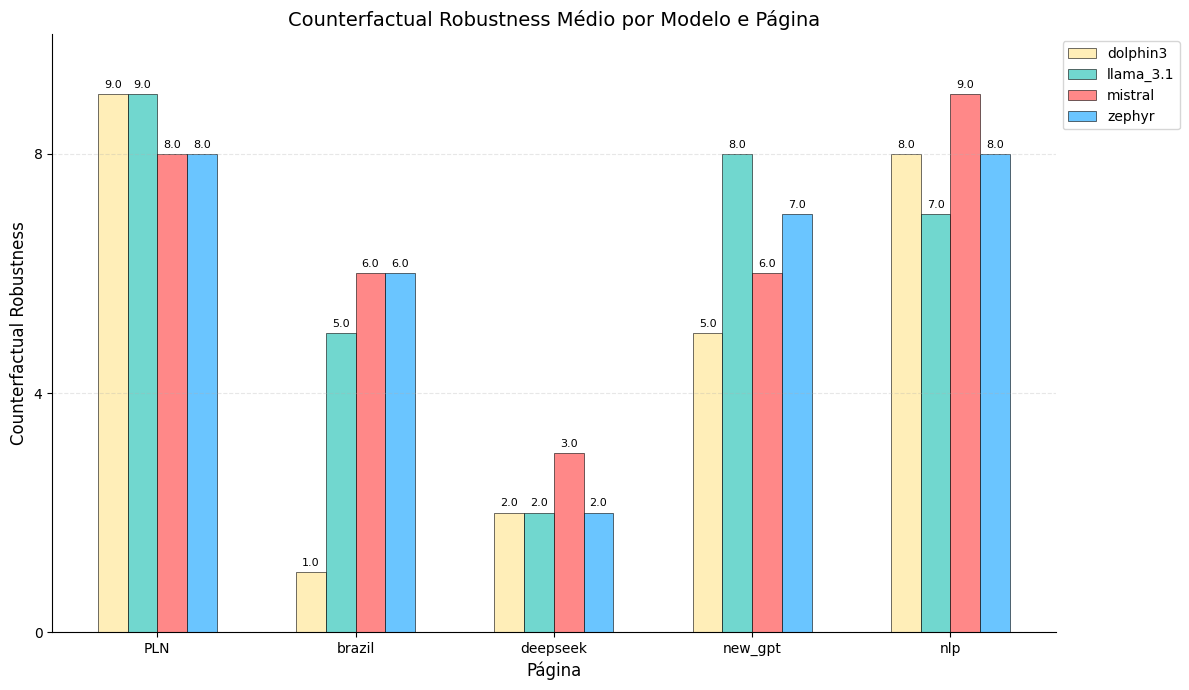

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Carregar os dados
df = pd.read_csv('perfomance_sem_s.csv')

# 2) Padronizar nome da coluna de página e corrigir typo
df = df.rename(columns={'page': 'Página'})
df['Página'] = df['Página'].replace({'deepeek': 'deepseek'})

# 3) Ordenar as páginas na sequência desejada
ordem = ['PLN', 'brazil', 'deepseek', 'new_gpt', 'nlp']
df['Página'] = pd.Categorical(df['Página'], categories=ordem, ordered=True)

# 4) Função para gráficos de barras das métricas específicas (modelos lado a lado)
def plot_metrics_bars(df, metrics_columns):
    """
    Cria gráficos de barras para cada métrica específica por página,
    mostrando cada modelo lado a lado
    """
    for metric in metrics_columns:
        # Criar pivot table para organizar dados (páginas x modelos)
        pivot_data = df.pivot_table(values=metric, index='Página', columns='model', aggfunc='mean')
        
        # Configurar posições das barras
        x = np.arange(len(pivot_data.index))  # posições das páginas
        width = 0.15  # largura das barras
        multiplier = 0
        
        # Criar gráfico
        fig, ax = plt.subplots(figsize=(12, 7))
        
        # Definir cores para cada modelo
        model_colors = {
            'mistral': '#FF6B6B',      # Vermelho claro
            'llama_3.1': '#4ECDC4', # Verde água
            'zephyr': '#45B7FF',   # Azul
            'dolphin3': '#FFEAA7',     # Verde claro
            #'qwen2.5-7b': '#FFEAA7'        # Amarelo claro
        }
        
        # Plotar barras para cada modelo
        for model in pivot_data.columns:
            offset = width * multiplier
            bars = ax.bar(x + offset, pivot_data[model], width, 
                         label=model, color=model_colors.get(model, '#95A5A6'),
                         alpha=0.8, edgecolor='black', linewidth=0.5)
            
            # Adicionar valores acima das barras
            for bar, value in zip(bars, pivot_data[model]):
                if not pd.isna(value):  # Verificar se o valor não é NaN
                    height = bar.get_height()
                    ax.annotate(f'{value:.1f}',
                               xy=(bar.get_x() + bar.get_width() / 2, height),
                               xytext=(0, 3),
                               textcoords="offset points",
                               ha='center', va='bottom',
                               fontsize=8, fontweight='normal')
            
            multiplier += 1
        
        # Configurações do gráfico
        ax.set_title(f'{metric} Médio por Modelo e Página', fontsize=14, fontweight='normal')
        ax.set_xlabel('Página', fontsize=12)
        ax.set_ylabel(f'{metric}', fontsize=12)
        
        # Definir escala do eixo Y de 0 a 50
        ax.set_ylim(0, 10)
        ax.set_yticks(np.arange(0, 11, 4))
        ax.set_yticklabels([f'{i}' for i in np.arange(0, 11, 4)])
        
        # Configurar eixo X
        ax.set_xticks(x + width * (len(pivot_data.columns) - 1) / 2)
        ax.set_xticklabels(pivot_data.index)
        
        # Adicionar grade horizontal
        ax.grid(True, alpha=0.3, linestyle='--', axis='y')
        
        # Remover bordas superior e direita
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adicionar legenda dos modelos
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        
        # Ajustar layout
        plt.tight_layout()
        
        # Salvar gráfico
        filename = f'{metric.lower().replace(" ", "_")}_modelos_por_pagina.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        
        plt.show()

# 5) Criar gráficos de barras para as métricas específicas
metrics_to_plot = ['Noise Robustness', 'Negative Rejection', 'Information Integration', 'Counterfactual Robustness']
plot_metrics_bars(df, metrics_to_plot)